In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

%matplotlib inline

## Read Data

In [2]:
df = pd.read_json('data.json', orient='split')
df.head(5)

,category,event_name,gender,age,marital_status,session_id,device,client_time,location,amount
0,Sports,View Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,2014-03-01 00:00:04,"{'latitude': 40.189788, 'city': 'Lyons', 'stat...",NaN
1,Technology,View Project,M,18-24,single,4459d001feb8438eae5f4ec24abcd992,iOS,2014-03-01 00:00:22,"{'latitude': 33.844371, 'city': 'Alpharetta', ...",NaN
2,Environment,View Project,M,55+,single,0db9ed700a184d48a9d04806696e3642,iOS,2014-03-01 00:00:32,"{'latitude': 42.446396, 'city': 'Westford', 's...",NaN
3,Technology,View Project,M,18-24,single,68195e2372bd4022b17220fc21de9138,android,2014-03-01 00:00:38,"{'latitude': 44.624413, 'city': 'Saranac', 'st...",NaN
4,Sports,View Project,F,25-34,married,9508a8385dc94773baba8aa7d1c2aa75,iOS,2014-03-01 00:00:51,"{'latitude': 36.747083, 'city': 'Lampe', 'stat...",NaN


## Data Cleaning and Visualization

#### Display unique values in category column

In [3]:
df.category.unique()

array(['Sports', 'Technology', 'Environment', 'Fashion', 'Games'],
      dtype=object)

In [4]:
# Keep Sports, Technology, and Environment as these relate to our problem statement
df_category_filtered = df[df['category'] != 'Fashion']
df_category_filtered = df_category_filtered[df['category'] != 'Games']


C:\Users\rushi\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
df_category_filtered.category.unique()

array(['Sports', 'Technology', 'Environment'], dtype=object)

In [6]:
df_category_filtered.head(10)

,category,event_name,gender,age,marital_status,session_id,device,client_time,location,amount
0,Sports,View Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,2014-03-01 00:00:04,"{'latitude': 40.189788, 'city': 'Lyons', 'stat...",NaN
1,Technology,View Project,M,18-24,single,4459d001feb8438eae5f4ec24abcd992,iOS,2014-03-01 00:00:22,"{'latitude': 33.844371, 'city': 'Alpharetta', ...",NaN
2,Environment,View Project,M,55+,single,0db9ed700a184d48a9d04806696e3642,iOS,2014-03-01 00:00:32,"{'latitude': 42.446396, 'city': 'Westford', 's...",NaN
3,Technology,View Project,M,18-24,single,68195e2372bd4022b17220fc21de9138,android,2014-03-01 00:00:38,"{'latitude': 44.624413, 'city': 'Saranac', 'st...",NaN
4,Sports,View Project,F,25-34,married,9508a8385dc94773baba8aa7d1c2aa75,iOS,2014-03-01 00:00:51,"{'latitude': 36.747083, 'city': 'Lampe', 'stat...",NaN
7,Technology,View Project,F,35-44,married,c6f18d84b43b4a4a90fa9a44016c3665,android,2014-03-01 00:02:18,"{'latitude': 37.103768, 'city': 'Los Banos', '...",NaN
9,Technology,View Project,F,45-54,married,e040fa23c3f84ad58ca59f1552fa3f0b,iOS,2014-03-01 00:02:39,"{'latitude': 40.203459, 'city': 'Newtown', 'st...",NaN
10,Technology,View Project,M,18-24,single,a0d400c1626047c29060259d08ee0385,android,2014-03-01 00:02:40,"{'latitude': 40.189788, 'city': 'Lyons', 'stat...",NaN
12,Sports,View Project,F,18-24,married,a1fdfe0bebed4510a9059bcfb3ba1325,iOS,2014-03-01 00:02:51,"{'latitude': 33.794055, 'city': 'Atlanta', 'st...",NaN
15,Technology,View Project,F,18-24,single,1b2a6e9a2e1f46b8827db37a28e7196e,iOS,2014-03-01 00:03:19,"{'latitude': 33.724907, 'city': 'Atlanta', 'st...",NaN


### Client time: keeping only the year because the rest is irrelevant

In [7]:
def client_time_edit(x):
    return x.year

In [8]:
df_category_filtered['client_time'] = df_category_filtered['client_time'].apply(client_time_edit)

In [9]:
df_category_filtered.head(10)

,category,event_name,gender,age,marital_status,session_id,device,client_time,location,amount
0,Sports,View Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,2014,"{'latitude': 40.189788, 'city': 'Lyons', 'stat...",NaN
1,Technology,View Project,M,18-24,single,4459d001feb8438eae5f4ec24abcd992,iOS,2014,"{'latitude': 33.844371, 'city': 'Alpharetta', ...",NaN
2,Environment,View Project,M,55+,single,0db9ed700a184d48a9d04806696e3642,iOS,2014,"{'latitude': 42.446396, 'city': 'Westford', 's...",NaN
3,Technology,View Project,M,18-24,single,68195e2372bd4022b17220fc21de9138,android,2014,"{'latitude': 44.624413, 'city': 'Saranac', 'st...",NaN
4,Sports,View Project,F,25-34,married,9508a8385dc94773baba8aa7d1c2aa75,iOS,2014,"{'latitude': 36.747083, 'city': 'Lampe', 'stat...",NaN
7,Technology,View Project,F,35-44,married,c6f18d84b43b4a4a90fa9a44016c3665,android,2014,"{'latitude': 37.103768, 'city': 'Los Banos', '...",NaN
9,Technology,View Project,F,45-54,married,e040fa23c3f84ad58ca59f1552fa3f0b,iOS,2014,"{'latitude': 40.203459, 'city': 'Newtown', 'st...",NaN
10,Technology,View Project,M,18-24,single,a0d400c1626047c29060259d08ee0385,android,2014,"{'latitude': 40.189788, 'city': 'Lyons', 'stat...",NaN
12,Sports,View Project,F,18-24,married,a1fdfe0bebed4510a9059bcfb3ba1325,iOS,2014,"{'latitude': 33.794055, 'city': 'Atlanta', 'st...",NaN
15,Technology,View Project,F,18-24,single,1b2a6e9a2e1f46b8827db37a28e7196e,iOS,2014,"{'latitude': 33.724907, 'city': 'Atlanta', 'st...",NaN


In [10]:
len(df_category_filtered['client_time'].unique())

1

Since there's only one year over which the data has been collected, its safe to just drop the client_time column from the dataframe.

In [11]:
df_category_filtered = df_category_filtered.drop('client_time', 1)

### Splitting the dataframe into two: 
1) View Project      2) Fund Project

In [12]:
df_category_filtered['event_name'].value_counts()

View Project    17696
Fund Project    12412
Name: event_name, dtype: int64

In [13]:
len(df_category_filtered['session_id'].unique())

8725

In [14]:
len(df_category_filtered['session_id'])

30108

In [15]:
df_view = df_category_filtered[df_category_filtered['event_name'] == 'View Project']
df_fund = df_category_filtered[df_category_filtered['event_name'] == 'Fund Project']

In [16]:
df_view.head(5)

,category,event_name,gender,age,marital_status,session_id,device,location,amount
0,Sports,View Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,"{'latitude': 40.189788, 'city': 'Lyons', 'stat...",NaN
1,Technology,View Project,M,18-24,single,4459d001feb8438eae5f4ec24abcd992,iOS,"{'latitude': 33.844371, 'city': 'Alpharetta', ...",NaN
2,Environment,View Project,M,55+,single,0db9ed700a184d48a9d04806696e3642,iOS,"{'latitude': 42.446396, 'city': 'Westford', 's...",NaN
3,Technology,View Project,M,18-24,single,68195e2372bd4022b17220fc21de9138,android,"{'latitude': 44.624413, 'city': 'Saranac', 'st...",NaN
4,Sports,View Project,F,25-34,married,9508a8385dc94773baba8aa7d1c2aa75,iOS,"{'latitude': 36.747083, 'city': 'Lampe', 'stat...",NaN


In [17]:
df_fund.head(5)

,category,event_name,gender,age,marital_status,session_id,device,location,amount
16,Sports,Fund Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,"{'latitude': 40.189788, 'city': 'Lyons', 'stat...",31.0
18,Technology,Fund Project,M,18-24,single,a0d400c1626047c29060259d08ee0385,android,"{'latitude': 40.189788, 'city': 'Lyons', 'stat...",39.0
25,Technology,Fund Project,M,18-24,single,4459d001feb8438eae5f4ec24abcd992,iOS,"{'latitude': 33.844371, 'city': 'Alpharetta', ...",36.0
35,Sports,Fund Project,M,18-24,married,be389e9be0e74398adcef3292ac409ee,android,"{'latitude': 45.408374, 'city': 'Lake Oswego',...",40.0
71,Technology,Fund Project,F,35-44,married,c6f18d84b43b4a4a90fa9a44016c3665,android,"{'latitude': 37.103768, 'city': 'Los Banos', '...",33.0


In [18]:
len(df_view['session_id'])

17696

Now, we can use the dataframe which contains the Fund Project to identify the segment in the View Project dataframe which could possibly fund the project.

## Studying the device column in Fund Project dataframe

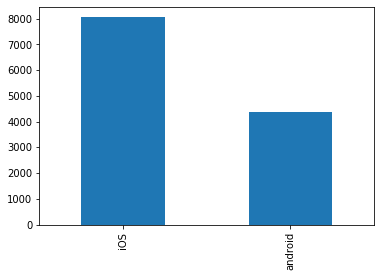

In [19]:
df_fund['device'].value_counts().plot.bar()

We can see that people using an iOS device tend to donate more. 

In [20]:
df_fund.head(10)

,category,event_name,gender,age,marital_status,session_id,device,location,amount
16,Sports,Fund Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,"{'latitude': 40.189788, 'city': 'Lyons', 'stat...",31.0
18,Technology,Fund Project,M,18-24,single,a0d400c1626047c29060259d08ee0385,android,"{'latitude': 40.189788, 'city': 'Lyons', 'stat...",39.0
25,Technology,Fund Project,M,18-24,single,4459d001feb8438eae5f4ec24abcd992,iOS,"{'latitude': 33.844371, 'city': 'Alpharetta', ...",36.0
35,Sports,Fund Project,M,18-24,married,be389e9be0e74398adcef3292ac409ee,android,"{'latitude': 45.408374, 'city': 'Lake Oswego',...",40.0
71,Technology,Fund Project,F,35-44,married,c6f18d84b43b4a4a90fa9a44016c3665,android,"{'latitude': 37.103768, 'city': 'Los Banos', '...",33.0
78,Sports,Fund Project,F,18-24,single,71ca342ead4f4da180da4f9b4baaf760,android,"{'latitude': 33.844371, 'city': 'Alpharetta', ...",53.0
100,Sports,Fund Project,F,18-24,married,a1fdfe0bebed4510a9059bcfb3ba1325,iOS,"{'latitude': 33.794055, 'city': 'Atlanta', 'st...",48.0
120,Technology,Fund Project,M,35-44,married,cfaa408840fc49b0bc34ebd4ee1cd6c5,iOS,"{'latitude': 30.912773, 'city': 'Eldorado', 's...",50.0
131,Sports,Fund Project,M,45-54,single,d23a964e8656403b853eb2a24139c408,android,"{'latitude': 39.102704, 'city': 'Kansas City',...",27.0
136,Technology,Fund Project,F,18-24,married,2844f7dd40c2400382b1456ac948983c,android,"{'latitude': 45.45509, 'city': 'Portland', 'st...",27.0


## Studying the marital_status column in Fund Project dataframe

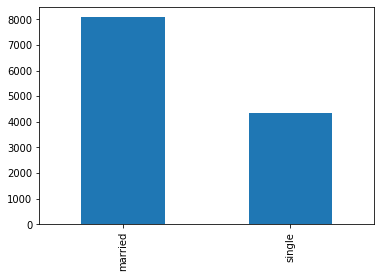

In [21]:
df_fund['marital_status'].value_counts().plot.bar()

We can see that married people tend to donate more. 

## Studying the age column in Fund Project dataframe

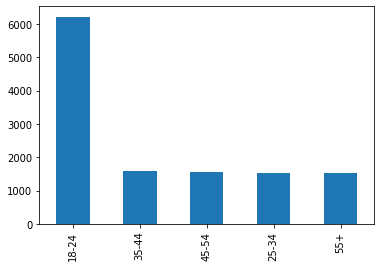

In [22]:
df_fund['age'].value_counts().plot.bar()

Therefore, we can see clearly that people belonging to the age group 18-24 donate the most.

## Studying the location column in Fund Project dataframe

Plotting the latitudes and longitudes in the fund dataframe

In [23]:
# round the longitude and latitude to 1 decimal point to group them better
# deleting the state and zip_code, since coordinates and city is enough
longitudes = []
latitudes = []
for _, d in df_fund['location'].iteritems(): 
    d['latitude'] = round(d.get('latitude'))
    d['longitude'] = round(d.get('longitude'))
    longitudes.append(int(d['longitude']))
    latitudes.append(int(d['latitude']))
    d.pop('state')
    d.pop('zip_code')

In [24]:
BBox = ((min(longitudes),   max(longitudes),      
         min(latitudes), max(latitudes)))
print(BBox)

(-168, -69, 21, 64)


In [25]:
ruh_m = plt.imread('map.png')

Plotting the longitudes and latitudes

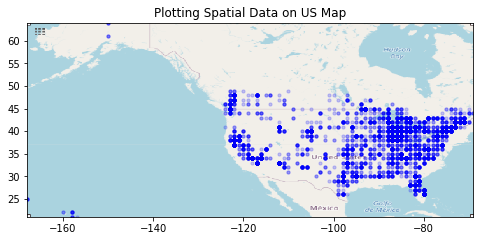

In [26]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(longitudes, latitudes, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on US Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

Plotting the points by density. It's much easier to see where most of the people donating live.

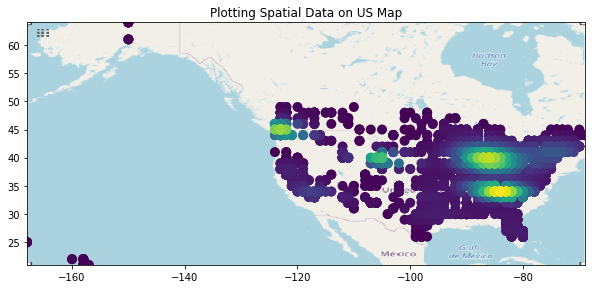

In [27]:
fig, ax = plt.subplots(figsize = (10,9))
x = np.array(longitudes)
y = np.array(latitudes)

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

ax.scatter(x, y, c=z, s=100, edgecolor='')
ax.set_title('Plotting Spatial Data on US Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

We can now see which cities or areas have high density of donators. Then we can use this information to target people in the View Project dataframe

# Conclusion

The people who were in the fund project were more inclined to be aged between 18 and 24, be married, use an iOS device, and be living in the areas/cities shown in the density map above.

We can then target the people in the View Project and Fund Project belonging to this demographic.